5. Use logistic regression to predict the probability of default using income and balance on the Default data set.  Estimate the test error of this logistic regression model using the validation set approach.  Make sure to set a seed.

a) Fit a logistic regression model using income and balance to predict default.

In [12]:
import os
import pandas as pd
direct = os.getcwd()

default = pd.read_csv(os.path.join(direct, 'Default.csv'))

In [38]:
default['default_io'] = default['default'].apply(lambda x: 1 if x =='Yes' else 0)
default['student_io'] = default['student'].apply(lambda x: 1 if x=='Yes' else 0)

In [39]:
import statsmodels.api as sm
model = sm.Logit(default['default_io'], sm.add_constant(default[['balance', 'income']])).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             default_io   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.4594
Time:                        13:33:30   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


b) Using the validation set approach, estimate the test error of this model.  Make sure to split the sample into a test and validation set, fit a multiple logistic regression model using only the training set, predict values for the validation set using the model (0.5 threshold), and compute the error based on actual values from the validation set.

In [22]:
from sklearn.linear_model import LogisticRegression as logit

In [40]:
forValidation = default.copy()
train = forValidation.sample(frac=0.5, random_state=0)
test = forValidation.drop(train.index)

model = logit().fit(train[['income', 'balance']], train['default_io'])

preds = model.predict(test[['income', 'balance']])

predictions = pd.DataFrame(preds, columns = ['Predicted'])
y_act = test['default_io'].reset_index(drop=True)
forAcc = pd.concat((y_act, predictions), axis=1)
forAcc['Correct'] = forAcc.apply(lambda row: 1 if row['default_io'] == row['Predicted'] else 0, axis=1)

accuracy = forAcc['Correct'].sum() / len(forAcc)
print(accuracy)

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9702


c) Repeat the process in (b) three times, using three different splits
of the observations

In [43]:
forValidation = default.copy()
train = forValidation.sample(frac=0.5, random_state=10)
test = forValidation.drop(train.index)

model = logit().fit(train[['income', 'balance']], train['default_io'])

preds = model.predict(test[['income', 'balance']])

predictions = pd.DataFrame(preds, columns = ['Predicted'])
y_act = test['default_io'].reset_index(drop=True)
forAcc = pd.concat((y_act, predictions), axis=1)
forAcc['Correct'] = forAcc.apply(lambda row: 1 if row['default_io'] == row['Predicted'] else 0, axis=1)

accuracy = forAcc['Correct'].sum() / len(forAcc)
print(accuracy)

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9658


In [44]:
forValidation = default.copy()
train = forValidation.sample(frac=0.5, random_state=35)
test = forValidation.drop(train.index)

model = logit().fit(train[['income', 'balance']], train['default_io'])

preds = model.predict(test[['income', 'balance']])

predictions = pd.DataFrame(preds, columns = ['Predicted'])
y_act = test['default_io'].reset_index(drop=True)
forAcc = pd.concat((y_act, predictions), axis=1)
forAcc['Correct'] = forAcc.apply(lambda row: 1 if row['default_io'] == row['Predicted'] else 0, axis=1)

accuracy = forAcc['Correct'].sum() / len(forAcc)
print(accuracy)

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9626


In [45]:
forValidation = default.copy()
train = forValidation.sample(frac=0.5, random_state=2)
test = forValidation.drop(train.index)

model = logit().fit(train[['income', 'balance']], train['default_io'])

preds = model.predict(test[['income', 'balance']])

predictions = pd.DataFrame(preds, columns = ['Predicted'])
y_act = test['default_io'].reset_index(drop=True)
forAcc = pd.concat((y_act, predictions), axis=1)
forAcc['Correct'] = forAcc.apply(lambda row: 1 if row['default_io'] == row['Predicted'] else 0, axis=1)

accuracy = forAcc['Correct'].sum() / len(forAcc)
print(accuracy)

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9638


d) Now add a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [46]:
forValidation = default.copy()
train = forValidation.sample(frac=0.5, random_state=0)
test = forValidation.drop(train.index)

model = logit().fit(train[['income', 'balance', 'student_io']], train['default_io'])

preds = model.predict(test[['income', 'balance', 'student_io']])

predictions = pd.DataFrame(preds, columns = ['Predicted'])
y_act = test['default_io'].reset_index(drop=True)
forAcc = pd.concat((y_act, predictions), axis=1)
forAcc['Correct'] = forAcc.apply(lambda row: 1 if row['default_io'] == row['Predicted'] else 0, axis=1)

accuracy = forAcc['Correct'].sum() / len(forAcc)
print(accuracy)

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9702


****Answer:**** This model did not see any improvement in test accuracy by introducing a student dummy variable

***
6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income
and balance in a multiple logistic regression model that uses both predictors.

In [78]:
import statsmodels.api as sm
model = sm.Logit(default['default_io'], sm.add_constant(default[['balance', 'income']])).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             default_io   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.4594
Time:                        14:03:17   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

c) Use the bootstrap method to estimate the standard errors of the logistic regression coefficients.

In [81]:
import numpy as np
import random

def create_boot(df):
    end = len(df)
    ixList = list(range(0, end))
    
    i = 0
    ix = []
    while i < end:
        elem = random.choice(ixList)
        ix.append(elem)
        i = i + 1

    rows = []
    for i in ix:
        row = df.iloc[i, :]
        rows.append(row)
        
    boot = pd.DataFrame(rows)
    boot.reset_index(drop=True, inplace=True)
    return boot

def get_estimates(df, x_cols, y):
    model = sm.Logit(df[y], sm.add_constant(df[x_cols])).fit()
    return model.bse

In [82]:
intList = []
balList = []
incList = []
for i in list(range(0, 10)):
    bootstrapped = create_boot(default)
    summary = get_estimates(bootstrapped, ['balance', 'income'], 'default_io')
    intList.append(summary['const'])
    balList.append(summary['balance'])
    incList.append(summary['income'])
    
intercept = sum(intList) / (len(intList) - 1)
balance = sum(balList) / (len(balList) - 1)
income = sum(incList) / (len(incList) - 1)

print('Intercept: {}'.format(intercept))
print('Balance: {}'.format(balance))
print('Income: {}'.format(income))

Optimization terminated successfully.
         Current function value: 0.082495
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076760
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085075
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082418
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081050
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073675
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.072787
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.070518
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076785
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

d) Comment on the estimated errors using both methods

****Answer:**** The estimates are very close for both methods

***
7. Use LOOCV on the weekly data set to estimate the test error estimate

In [89]:
weekly = pd.read_csv(os.path.join(direct, 'weekly.csv'))
weekly['direction_io'] = weekly['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

a) Fit a logistic regression predicting Direction using Lag1 and Lag2

In [92]:
model = sm.Logit(weekly['direction_io'], sm.add_constant(weekly[['Lag1', 'Lag2']])).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           direction_io   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                0.005335
Time:                        14:18:02   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.

b) Use the same, but don't use the first observation

In [97]:
ix = 0
test = weekly.iloc[ix, :]
train = weekly.drop([ix])

model = logit().fit(train[['Lag1', 'Lag2']], train['direction_io'])

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


c) Use the model from b to predict the first observation's direction. Was the prediction correct?

In [117]:
toPred = pd.DataFrame(test[['Lag1', 'Lag2']]).transpose()
pred = model.predict(toPred)[0]
act = test['direction_io']
pred == act

False

d) Using a for loop from i = 1 to n, do the following:

* Fit a logistic model using all but the ith observation
* Predict the direction for the ith observation.
* Determine the accuracy of the prediction

In [118]:
correct = []
for i in range(0, len(weekly)):
    test = weekly.iloc[i, :]
    train = weekly.drop([ix])
    model = logit().fit(train[['Lag1', 'Lag2']], train['direction_io'])
    
    toPred = pd.DataFrame(test[['Lag1', 'Lag2']]).transpose()
    pred = model.predict(toPred)[0]
    act = test['direction_io']
    if pred == act:
        correct.append(1)
    else:
        correct.append(0)

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

e) Using d, calculate the test error rate

In [119]:
sum(correct) / len(correct)

0.5555555555555556

***
8. Perform cross validation on a simulated data set

a) Let x be 100 random numbers from a standard normal distribution, and y = x - 2*(x^2) + e, where e is also random from the standard normal distribution.  What is n, and p?

In [142]:
xs = []
np.random.seed(0)
for i in list(range(0, 100)):
    x = np.random.normal()
    xs.append(x)
    
data = pd.DataFrame(xs, columns= ['X'])

data['Y'] = data['X'].apply(lambda x: x - 2*x*x + np.random.normal())

****Answer:**** n = 100, p = 1

b) Create a scatter plot of X vs Y

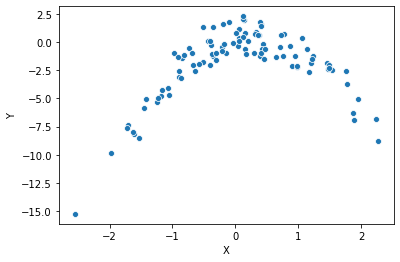

In [143]:
import seaborn as sns
sns.scatterplot(data['X'], data['Y']);

c) Compute the LOOCV estimated test error for Y = β0 + β1X + β2X^2 + error

In [144]:
data['X2'] = data['X'] * data['X']

In [145]:
from sklearn.linear_model import LinearRegression as linreg

In [146]:
predictions = []
for i in range(0, len(data)):
    test = data.iloc[i, :]
    train = data.drop([i])
    model = linreg().fit(data[['X', 'X2']], data['Y'])
    
    toPred = pd.DataFrame(test[['X', 'X2']]).transpose()
    pred = model.predict(toPred)[0]
    act = test['Y']
    predictions.append([act, pred])

In [147]:
df = pd.DataFrame(predictions, columns = ['Actual', 'Predicted'])
df['Error'] = df['Predicted'] - df['Actual']
df['Squared Error'] = df['Error'] * df['Error']

mse = df['Squared Error'].sum() / len(df)
mse

1.049715772494475

d) Repeat c using a different random seed and compare results from c

In [148]:
xs = []
np.random.seed(10)
for i in list(range(0, 100)):
    x = np.random.normal()
    xs.append(x)
    
data = pd.DataFrame(xs, columns= ['X'])

data['Y'] = data['X'].apply(lambda x: x - 2*x*x + np.random.normal())

In [151]:
data['X2'] = data['X'] * data['X']

In [152]:
predictions = []
for i in range(0, len(data)):
    test = data.iloc[i, :]
    train = data.drop([i])
    model = linreg().fit(data[['X', 'X2']], data['Y'])
    
    toPred = pd.DataFrame(test[['X', 'X2']]).transpose()
    pred = model.predict(toPred)[0]
    act = test['Y']
    predictions.append([act, pred])

In [153]:
df = pd.DataFrame(predictions, columns = ['Actual', 'Predicted'])
df['Error'] = df['Predicted'] - df['Actual']
df['Squared Error'] = df['Error'] * df['Error']

mse = df['Squared Error'].sum() / len(df)
mse

0.9655518460432954

f) What are the statistical significance of the estimates?

In [155]:
model = sm.OLS(data['Y'], sm.add_constant(data[['X', 'X2']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     407.4
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           6.35e-48
Time:                        14:49:12   Log-Likelihood:                -140.14
No. Observations:                 100   AIC:                             286.3
Df Residuals:                      97   BIC:                             294.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0877      0.121      0.725      0.4

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


***
9. Using the Boston data set

a) What is the population mean (mu) for medv?

In [158]:
boston = pd.read_csv(os.path.join(direct, 'Boston.csv'))
boston['medv'].describe()['mean']

22.532806324110698

b) Provide an estimate of the standard error of mu. Interpret these results.

In [161]:
boston['medv'].describe()['std'] / len(boston)

0.01817609503434747

c) Estimate mu using bootstrap

In [182]:
meanList = []
for i in range(0, 100):
    bootstrapped = create_boot(boston)
    mean = bootstrapped['medv'].describe()['mean']
    meanList.append(mean)
    
mu_hat = sum(meanList) / len(meanList)
mu_hat

22.556081027667982

d) Based on the estimate, provide a 95% CI for mu.

In [183]:
import statistics
stdev_hat = statistics.stdev(meanList)

In [184]:
lower = mu_hat - 1.96*(stdev_hat)
upper = mu_hat + 1.96*(stdev_hat)
print('({}, {})'.format(lower, upper))

(21.626378092510834, 23.48578396282513)


e) Using the dataset, provide an estimate for the median

In [185]:
median = boston['medv'].describe()['50%']
median

21.2

f) Estimate the standard error of the median using bootstrap

In [186]:
medianList = []
for i in range(0, 100):
    bootstrapped = create_boot(boston)
    median = bootstrapped['medv'].describe()['50%']
    medianList.append(median)

In [191]:
stdev_hat = statistics.stdev(medianList)
stdev_hat

0.32773287656846095

g) Using the dataset, estimate the 10th percentile

In [188]:
boston['medv'].quantile(0.1)

12.75

h) Estimate the standard error of the percentile using bootstrap

In [189]:
decileList = []
for i in range(0, 100):
    bootstrapped = create_boot(boston)
    decile = bootstrapped['medv'].quantile(0.1)
    decileList.append(decile)

In [192]:
stdev_hat = statistics.stdev(decileList)
stdev_hat

0.5047278994916494